In [21]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [22]:
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df = df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

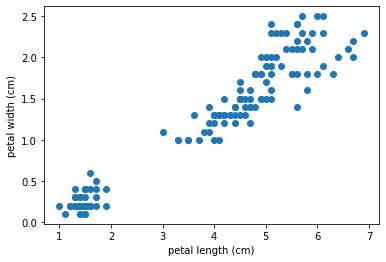

In [25]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [26]:
from sklearn.cluster import KMeans
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [27]:
km = KMeans(n_clusters = 3)
y_p = km.fit_predict(df)
y_p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
df['cluster'] = y_p
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [29]:
df.cluster.unique()

array([1, 2, 0])

In [31]:
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df0 = df[df.cluster==0]

In [33]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

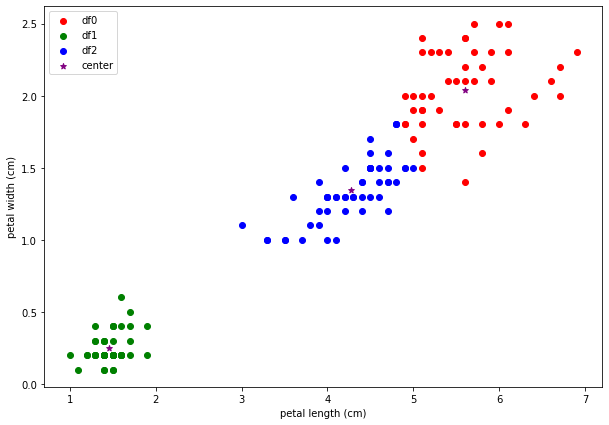

In [41]:
plt.figure(figsize = (10,7))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',label='df0')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',label='df1')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',label='df2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple',marker="*",label='center')

plt.legend()

In [45]:
#Elbow Plot
sse = []
k_rng = range(1,10)
for i in k_rng:
    kk = KMeans(n_clusters=i)
    kk.fit(df)
    sse.append(kk.inertia_)

C:\Users\khanm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


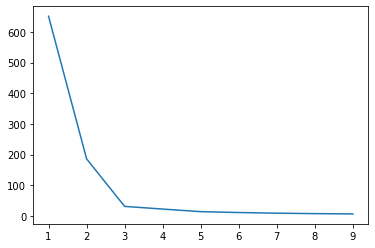

In [46]:
plt.plot(k_rng,sse)